In [1]:
'''Import the libraries'''
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow import keras
from keras import layers
import matplotlib.image as img

%matplotlib inline

In [2]:
!pip install split-folders
'''To train the data 60 in 20 and 20'''
import splitfolders
splitfolders.ratio('./dataset', output="output", seed=1337, ratio=(.6, 0.2,0.2))

Copying files: 4000 files [00:10, 368.98 files/s]


In [3]:
'''To preprocess data with keras'''
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(128, 128),
batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(128, 128),
batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(128, 128),
batch_size=64
)

Found 2400 files belonging to 5 classes.
Found 800 files belonging to 5 classes.
Found 800 files belonging to 5 classes.


In [4]:
'''rice classes'''
class_names = train_ds.class_names
print(class_names)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


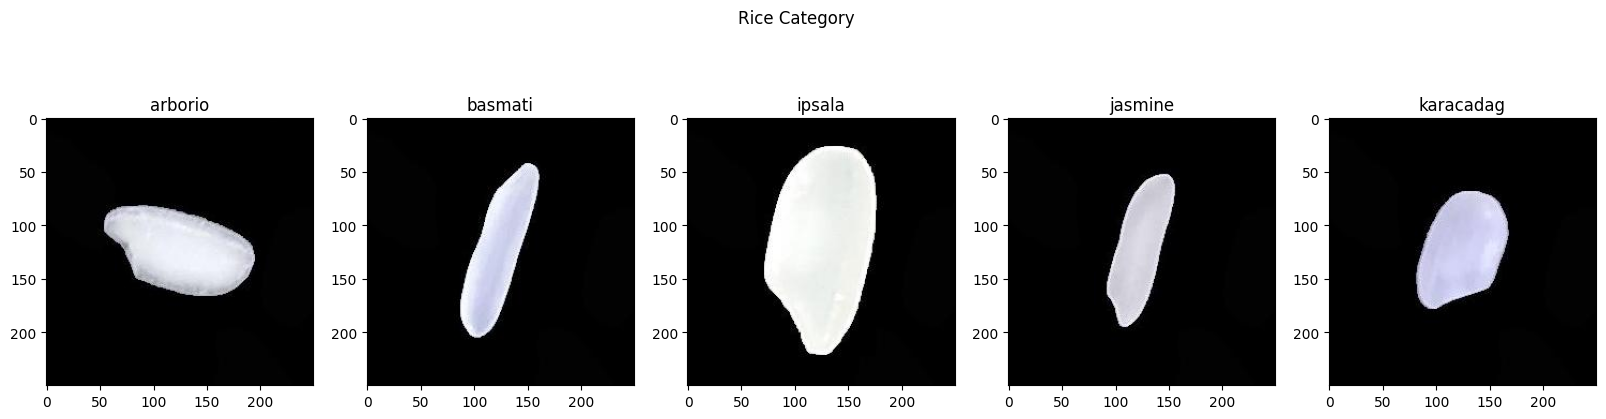

In [5]:
'''To create the figure'''
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
'''To take data types to predict'''
arborio_img = img.imread('./dataset/Arborio/Arborio (201).jpg')
basmati_img = img.imread('./dataset//Basmati/basmati (201).jpg')
ipsala_img = img.imread('./dataset/Ipsala/Ipsala (201).jpg')
jasmine_img = img.imread('./dataset/Jasmine/Jasmine (201).jpg')
karacadag_img = img.imread('./dataset/Karacadag/Karacadag (201).jpg')

'''Give names to images'''
ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')
'''Run the images of the types of rice'''
ax[0].imshow(arborio_img)
ax[1].imshow(basmati_img)
ax[2].imshow(ipsala_img)
ax[3].imshow(jasmine_img)
ax[4].imshow(karacadag_img)

In [6]:
'''layers are created with keras sequentially'''
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255))
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3), input_shape=(128,128,1),activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())
'''layers are created with keras sequentially'''
model.add(keras.layers.Dropout(0.20))
'''layers are created with keras sequentially'''
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())
'''layers are created for training'''
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(30,"softmax"))
model.add(keras.layers.Dense(5,"softmax"))

In [7]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "RMSprop",metrics=["accuracy"])

In [8]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=30, batch_size=64, verbose=1)

Epoch 1/30
38/38 [==============================] - 53s 1s/step - loss: 1.4133 - accuracy: 0.5875 - val_loss: 1.6327 - val_accuracy: 0.2000
Epoch 2/30
38/38 [==============================] - 51s 1s/step - loss: 1.2810 - accuracy: 0.7763 - val_loss: 1.6599 - val_accuracy: 0.2000
Epoch 3/30
38/38 [==============================] - 49s 1s/step - loss: 1.2334 - accuracy: 0.7846 - val_loss: 1.6673 - val_accuracy: 0.2000
Epoch 4/30
38/38 [==============================] - 55s 1s/step - loss: 1.1892 - accuracy: 0.7854 - val_loss: 1.6691 - val_accuracy: 0.2000
Epoch 5/30
38/38 [==============================] - 52s 1s/step - loss: 1.1462 - accuracy: 0.7867 - val_loss: 1.4666 - val_accuracy: 0.3950
Epoch 6/30
38/38 [==============================] - 52s 1s/step - loss: 1.1055 - accuracy: 0.7846 - val_loss: 1.4502 - val_accuracy: 0.4000
Epoch 7/30
38/38 [==============================] - 49s 1s/step - loss: 1.0624 - accuracy: 0.7883 - val_loss: 1.5143 - val_accuracy: 0.2750
Epoch 8/30
38/38 [==

In [9]:
'''The model summary is displayed'''
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0

In [10]:
'''The history of the metrics'''
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

In [11]:
'''Evaluate the model'''
loss, accuracy = model.evaluate(test_ds)

13/13 [==============================] - 4s 291ms/step - loss: 0.5000 - accuracy: 0.7925


In [12]:
model.save('my_model.h5')

In [13]:
from tensorflow import keras
loaded_model = keras.models.load_model('my_model.h5')

1/1 [==============================] - 0s 310ms/step
Jasmine
1/1 [==============================] - 0s 72ms/step
Arborio
1/1 [==============================] - 0s 31ms/step
Jasmine
1/1 [==============================] - 0s 28ms/step
Basmati
1/1 [==============================] - 0s 30ms/step
Ipsala
1/1 [==============================] - 0s 29ms/step
Basmati
1/1 [==============================] - 0s 29ms/step
Jasmine
1/1 [==============================] - 0s 28ms/step
Jasmine
1/1 [==============================] - 0s 28ms/step
Arborio
1/1 [==============================] - 0s 29ms/step
Jasmine
1/1 [==============================] - 0s 32ms/step
Arborio
1/1 [==============================] - 0s 29ms/step
Jasmine
1/1 [==============================] - 0s 29ms/step
Basmati


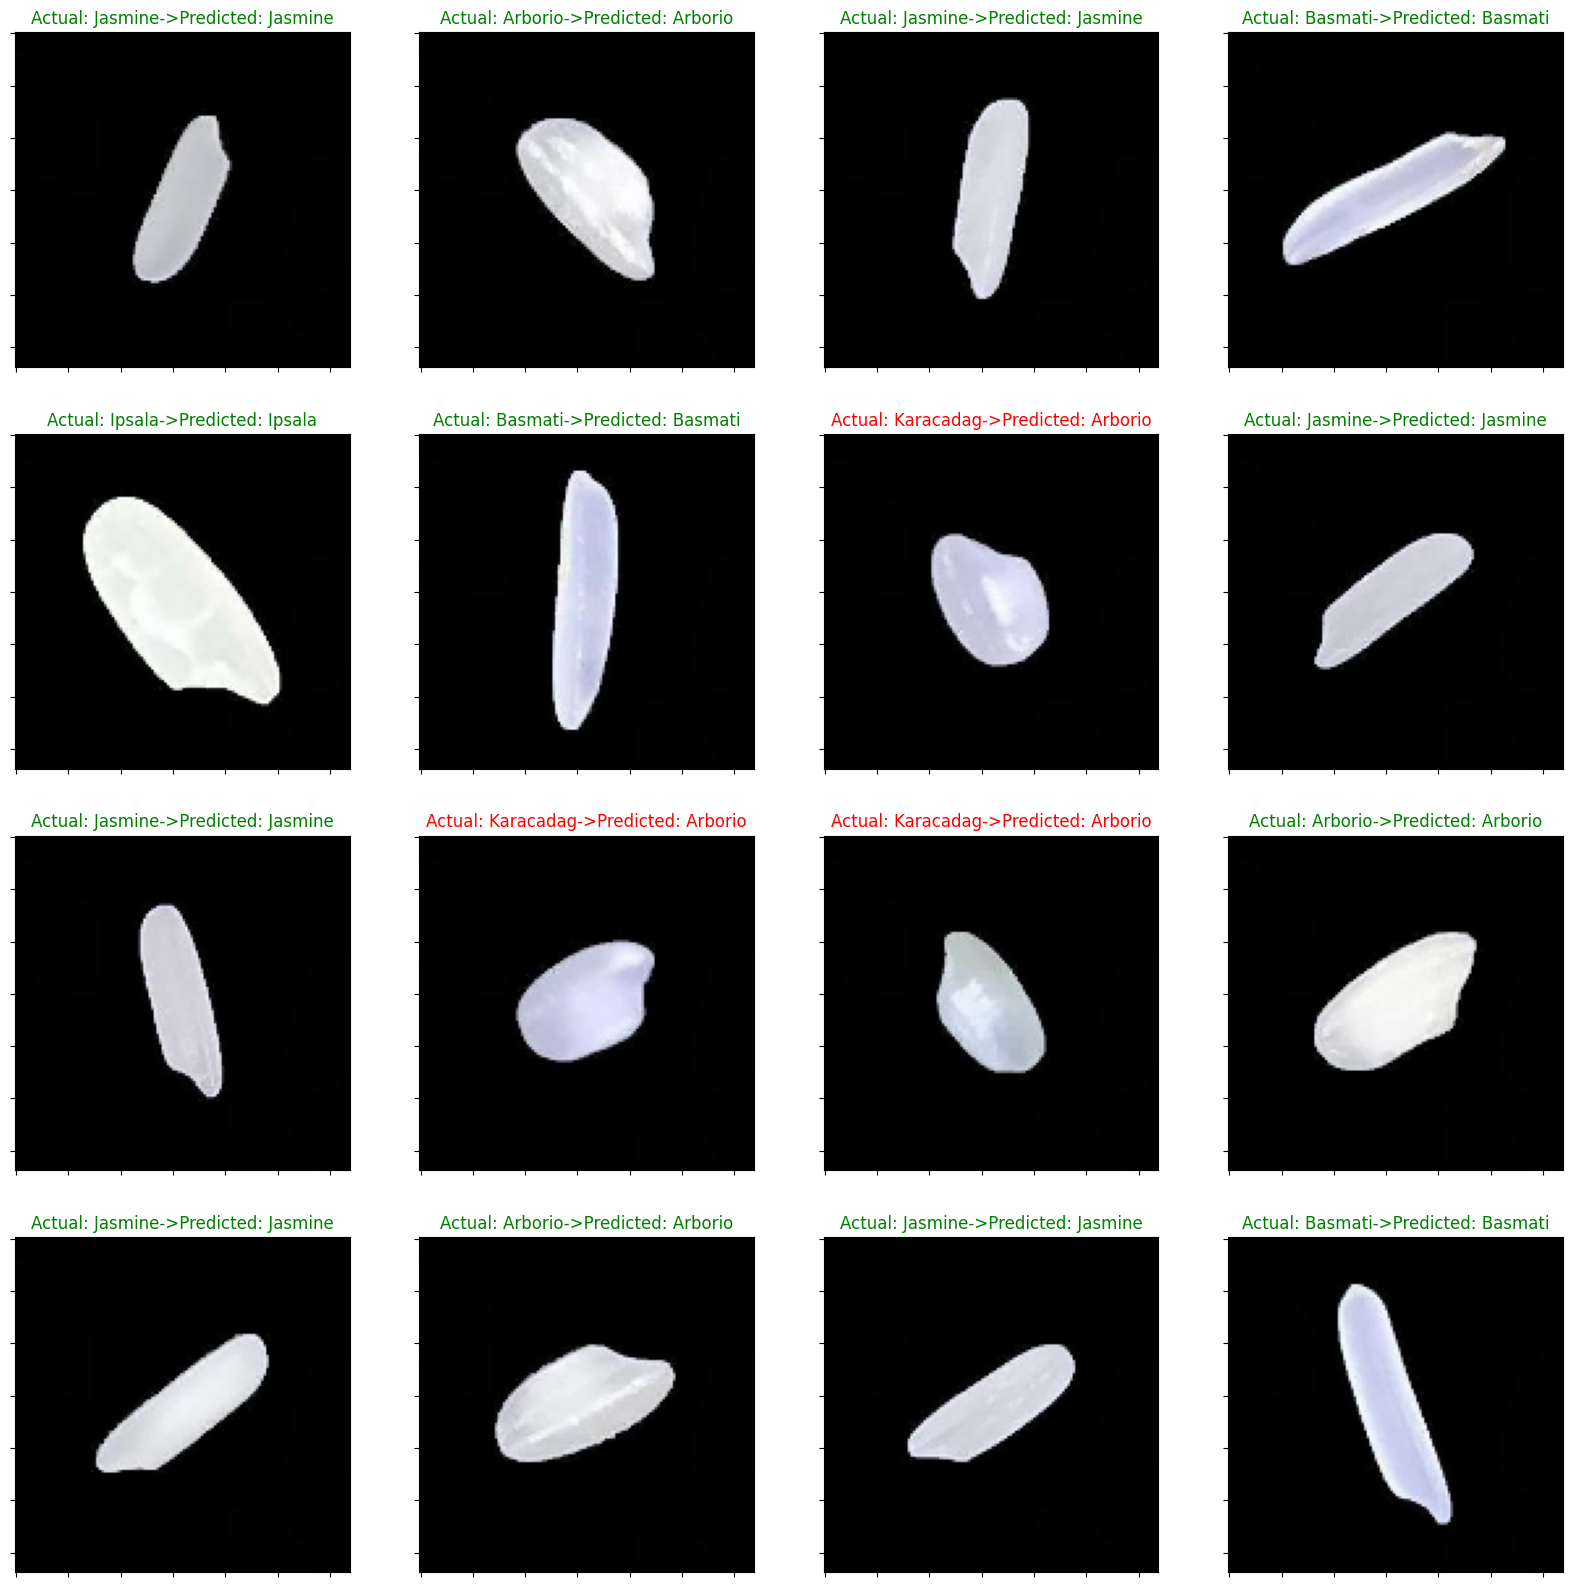

In [14]:
'''The graphs of the prediction layers are created'''
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = loaded_model.predict(tf.expand_dims(images[i], 0))
#         print(predictions)
        score = tf.nn.softmax(predictions[0])
        
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]]+"->Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            print(class_names[np.argmax(score)])
            
        else:
            plt.title("Actual: "+class_names[labels[i]]+"->Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        '''The graphs are shown with the prediction'''
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])